In [1]:
from datetime import datetime, timedelta

import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from util.stock_loader import Loader

In [2]:
DATA = '../models/qp/data'
SYMBOLS = [
    'AAPL', 'ABMD', 'ABNB', 'ADBE', 'ADYEY', 'AMD', 'AMZN', 'ANET',
    'ASML', 'AXON', 'BROS', 'BYND', 'CHWY', 'DDOG', 'DOCS', 'DOCU',
    'DUOL', 'EDIT', 'ETSY', 'FLGT', 'GH', 'GMED', 'GOOG', 'INTG',
    'ISRG', 'JD', 'LSPD', 'LULU', 'MDB', 'MELI', 'MNST', 'MSFT', 'MTCH',
    'NVCR', 'NVDA', 'OKTA', 'OPEN', 'PANW', 'PAYC', 'PINS', 'QDEL',
    'RBLX', 'RDFN', 'RGEN', 'RIVN', 'ROKU', 'RVLV', 'SE', 'SHOP',
    'SNOW', 'TASK', 'TDOC', 'TEAM', 'TREX', 'TTD', 'TTWO', 'TWLO',
    'TWTR', 'TYL', 'UPST', 'VEEV', 'VLD', 'XPEV', 'ZEN', 'ZM']
INDICES = ['^GSPC', # S&P 500
           '^IXIC', # Nasdaq
           '^NYA']  # NY Stock Exchange (total)
len(SYMBOLS)

65

In [3]:
N_YEARS = 10 # 5
N_DAYS = int(round(365.25 * N_YEARS))
END = (datetime.now() + timedelta(1)).date()
START = str(END - timedelta(N_DAYS))
START, END

('2012-08-20', datetime.date(2022, 8, 20))

In [4]:
batch = SYMBOLS + INDICES # run all
stock_loader = Loader(batch, START, str(END), verbose=True)
data = stock_loader.download().rename(columns={'Adj Close': 'AdjClose'})

[*********************100%***********************]  68 of 68 completed
Generating derived columns...
   ...AAPL
   ...ABMD
   ...ABNB
   ...ADBE
   ...ADYEY
   ...AMD
   ...AMZN
   ...ANET
   ...ASML
   ...AXON
   ...BROS
   ...BYND
   ...CHWY
   ...DDOG
   ...DOCS
   ...DOCU
   ...DUOL
   ...EDIT
   ...ETSY
   ...FLGT
   ...GH
   ...GMED
   ...GOOG
   ...INTG
   ...ISRG
   ...JD
   ...LSPD
   ...LULU
   ...MDB
   ...MELI
   ...MNST
   ...MSFT
   ...MTCH
   ...NVCR
   ...NVDA
   ...OKTA
   ...OPEN
   ...PANW
   ...PAYC
   ...PINS
   ...QDEL
   ...RBLX
   ...RDFN
   ...RGEN
   ...RIVN
   ...ROKU
   ...RVLV
   ...SE
   ...SHOP
   ...SNOW
   ...TASK
   ...TDOC
   ...TEAM
   ...TREX
   ...TTD
   ...TTWO
   ...TWLO
   ...TWTR
   ...TYL
   ...UPST
   ...VEEV
   ...VLD
   ...XPEV
   ...ZEN
   ...ZM
   ...^GSPC
   ...^IXIC
   ...^NYA


In [5]:
data['Date'].tail()

2512   2022-08-15
2513   2022-08-16
2514   2022-08-17
2515   2022-08-18
2516   2022-08-19
Name: Date, dtype: datetime64[ns]

In [6]:
spx = data['DayToDayChange']['^GSPC']
spx = spx[1:]
#spx = spx / spx[1]
spx

1       0.996502
2       1.000226
3       0.991928
4       1.006455
5       0.999511
          ...   
2512    1.003970
2513    1.001876
2514    0.992762
2515    1.002270
2516    0.987100
Name: ^GSPC, Length: 2516, dtype: float64

In [7]:
data['DayToDayChange'].quantile(q=[0.75], axis=1).T[1:]

,0.75
1,0.997225
2,1.007866
3,1.008993
4,1.006183
5,1.008074
...,...
2512,1.014940
2513,1.003401
2514,0.984185
2515,1.002415


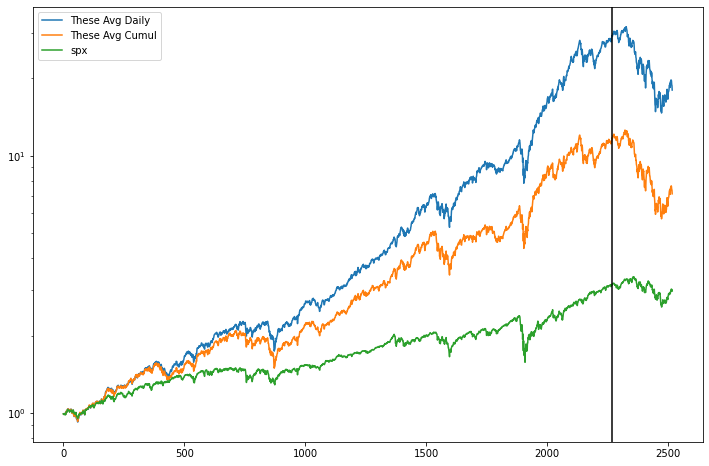

In [8]:
plt.figure(figsize=[12, 8])
plt.plot(data['DayToDayChange'].mean(axis=1)[1:].cumprod(), 
         label='These Avg Daily')
plt.plot(data['DayToDayChange'].cumprod().mean(axis=1),
         label='These Avg Cumul')
plt.plot(spx.cumprod(), label='spx')
plt.yscale('log')
plt.legend();

n = len(spx)
one_year = n - 250
plt.axvline(x=one_year, color='k');

In [9]:
out = pd.DataFrame(data.Date)
out['mine1'] = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
out['mine2'] = data['DayToDayChange'].cumprod().mean(axis=1)
out.head()

,Date,mine1,mine2
0,2012-08-20,NaN,NaN
1,2012-08-21,0.994057,0.994057
2,2012-08-22,0.994487,0.994507
3,2012-08-23,0.991278,0.991276
4,2012-08-24,0.992719,0.992701


In [10]:
out.tail()

,Date,mine1,mine2
2512,2022-08-15,19.659485,7.638694
2513,2022-08-16,19.525139,7.583428
2514,2022-08-17,18.872168,7.380454
2515,2022-08-18,18.728969,7.364433
2516,2022-08-19,17.980573,7.112425


In [11]:
!ls ../data

dev_quantiles.csv    myHistoricTest.RData scoring.csv
historic.csv         nasdaq1965.csv       sp1950.csv
mine.csv             nya1965.csv          wilshire1990.csv
myHistoric.RData     pct_params


In [12]:
out.iloc[1:, :].to_csv('../data/mine.csv', index=False)

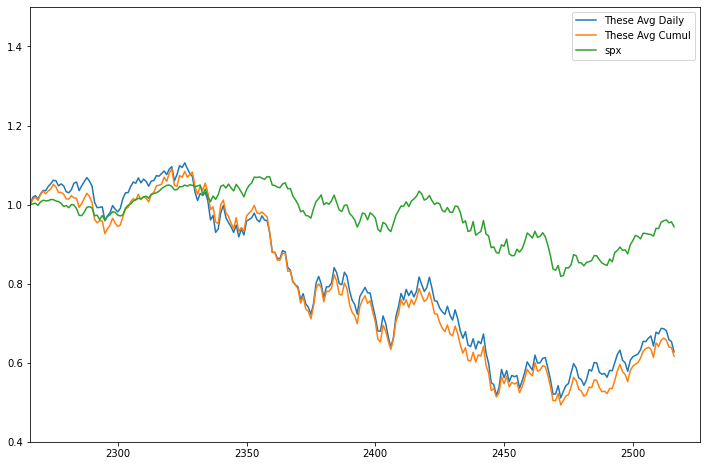

In [13]:
plt.figure(figsize=[12, 8])
a = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
n = len(a)
start = n - 250
a = a / a[start]
b = data['DayToDayChange'].cumprod().mean(axis=1)
b = b / b[start]
s = spx.cumprod()
s = s / s[start]
plt.plot(a, label='These Avg Daily')
plt.plot(b, label='These Avg Cumul')
plt.plot(s, label='spx')
#plt.yscale('log')
plt.xlim([one_year, n + 10])
plt.ylim(0.4, 1.5)
plt.legend();

In [14]:
def get_stock_data(stock, data):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock]]
    first_value = (sub.Value[stock][sub.Value[stock].notna()]
                   .index[0])
    sub = sub.loc[first_value:, :]
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    sub.fillna(method='ffill', inplace=True)
    return sub

In [15]:
rblx = get_stock_data('SE', data)
rblx.head()

,Value,Close,High,Low,Open,LogValue,IntradayChange,DayToDayChange,OvernightChange
1301,16.26,16.26,16.990,14.00,16.25,2.788708,1.000615,NaN,NaN
1302,15.26,15.26,16.399,15.12,16.10,2.725235,0.947826,0.938499,0.990160
1303,15.24,15.24,15.860,14.77,15.40,2.723924,0.989610,0.998689,1.009174
1304,13.73,13.73,15.430,13.62,15.10,2.619583,0.909271,0.900919,0.990814
1305,14.02,14.02,14.160,13.81,13.82,2.640485,1.014472,1.021122,1.006555


In [16]:
rblx = rblx[['Value', 'Close', 'High', 'Low']]
rblx.head()

,Value,Close,High,Low
1301,16.26,16.26,16.990,14.00
1302,15.26,15.26,16.399,15.12
1303,15.24,15.24,15.860,14.77
1304,13.73,13.73,15.430,13.62
1305,14.02,14.02,14.160,13.81


In [17]:
rblx['NextHigh'] = rblx.High.shift(-1)
rblx['NextLow'] = rblx.Low.shift(-1)
rblx['HighMult'] = rblx.NextHigh / rblx.Close
rblx['LowMult'] = rblx.NextLow / rblx.Close
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult
1301,16.26,16.26,16.990,14.00,16.399,15.12,1.008549,0.929889
1302,15.26,15.26,16.399,15.12,15.860,14.77,1.039318,0.967890
1303,15.24,15.24,15.860,14.77,15.430,13.62,1.012467,0.893701
1304,13.73,13.73,15.430,13.62,14.160,13.81,1.031318,1.005827
1305,14.02,14.02,14.160,13.81,14.130,13.80,1.007846,0.984308


0.05    0.987429
Name: HighMult, dtype: float64


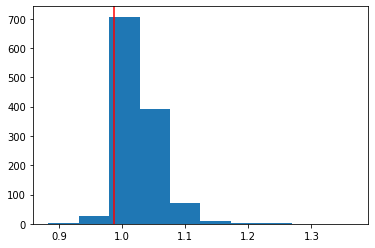

In [18]:
# For selling:
high_05 = rblx.HighMult.quantile(q=[0.05])
print(high_05)
plt.hist(rblx.HighMult)
plt.axvline(x=high_05[0.05], color='red');

1.0157351494613978


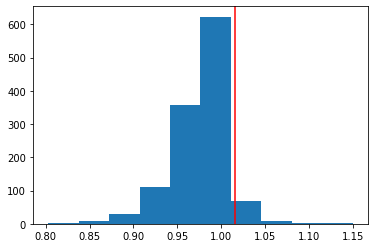

In [19]:
# For buying:
low_95 = rblx.LowMult.quantile(q=[0.95])
print(low_95.tolist()[0])
plt.hist(rblx.LowMult)
plt.axvline(x=low_95[0.95], color='red');

In [20]:
def get_hilo_mult(stock, ci=0.95):
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    sell_pt = stock.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt = stock.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt, sell_pt

In [21]:
get_hilo_mult(rblx)

(1.0157351494613978, 0.9874292654729956)

In [22]:
aapl = get_stock_data('AAPL', data)
get_hilo_mult(aapl)

(1.0082656309731297, 0.9940764553692383)

In [23]:
def get_macd(stock_data, fast=60, slow=90, signal=80):
    df = stock_data.copy()
    exp1 = df.Value.ewm(span=fast, adjust=False).mean()
    exp2 = df.Value.ewm(span=slow, adjust=False).mean()
    macd = exp1 - exp2
    exp3 = macd.ewm(span=signal, adjust=False).mean()
    histo = macd - exp3
    hdiff = histo.diff(1)
    is_rising = 1 * (hdiff > 0)
    return is_rising

In [24]:
rblx['Trend'] = get_macd(rblx)
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult,Trend
1301,16.26,16.26,16.990,14.00,16.399,15.12,1.008549,0.929889,0
1302,15.26,15.26,16.399,15.12,15.860,14.77,1.039318,0.967890,0
1303,15.24,15.24,15.860,14.77,15.430,13.62,1.012467,0.893701,0
1304,13.73,13.73,15.430,13.62,14.160,13.81,1.031318,1.005827,0
1305,14.02,14.02,14.160,13.81,14.130,13.80,1.007846,0.984308,0


In [25]:
def get_hilo_mults(stock, ci=0.95):
    stock['Trend'] = get_macd(stock)
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    upward = stock[stock.Trend == 1]
    downward = stock[stock.Trend == 0]
    sell_pt_up = upward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_up = upward.LowMult.quantile(q=[ci]).tolist()[0]
    sell_pt_down = downward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_down = downward.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt_up, sell_pt_up, buy_pt_down, sell_pt_down

In [26]:
get_hilo_mults(rblx)

(1.0119118946041719, 0.9873075391007848, 1.017696518465112, 0.9878937366727518)

In [27]:
get_hilo_mults(aapl)

(1.006297871175406, 0.995534814833423, 1.0097576433644384, 0.9923329077628378)

In [28]:
out = []
for symbol in batch:
    stock = get_stock_data(symbol, data)
    mults = get_hilo_mults(stock)
    out.append([symbol, *mults])
df = pd.DataFrame(
    out, 
    columns=['stock', 'buy_pt_up', 'sell_pt_up', 'buy_pt_down', 
             'sell_pt_down'])
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down
0,AAPL,1.006298,0.995535,1.009758,0.992333
1,ABMD,1.003984,0.996972,1.005079,0.996690
2,ABNB,1.011095,0.993346,1.012635,0.981947
3,ADBE,1.005122,0.995754,1.007081,0.994634
4,ADYEY,1.025128,0.977701,1.028975,0.966381


In [29]:
last = data.index.max()
price = pd.DataFrame(data.loc[last, 'Value'])
price.columns = ['price']
price['stock'] = price.index
price

,price,stock
AAPL,171.520004,AAPL
ABMD,270.679993,ABMD
ABNB,114.760002,ABNB
ADBE,425.054993,ADBE
ADYEY,16.219999,ADYEY
...,...,...
ZEN,76.550003,ZEN
ZM,99.5,ZM
^GSPC,4228.47998,^GSPC
^IXIC,12705.214844,^IXIC


In [30]:
df = df.merge(price, how='left', on='stock')
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down,price
0,AAPL,1.006298,0.995535,1.009758,0.992333,171.520004
1,ABMD,1.003984,0.996972,1.005079,0.996690,270.679993
2,ABNB,1.011095,0.993346,1.012635,0.981947,114.760002
3,ADBE,1.005122,0.995754,1.007081,0.994634,425.054993
4,ADYEY,1.025128,0.977701,1.028975,0.966381,16.219999


In [32]:
df.to_csv('mults.csv', index=False)
!open ./mults.csv